Lucas van Wijk: 1719949

https://github.com/LucasVanWijk/HPP_Herkansing


# Results

In [ ]:
baseline = {
    "10k": [5.00305e+09, 0.00331638, "serial"],
    "100k": [5.01051e+10, 0.018546, "serial"],
    "1m": [4.99652e+11, 0.137988, "serial"],
    "10m": [4.99993e+12, 1.27488, "serial"],
}
parallel = {
    "10k": [5.00305e+09, 0.00192857,"parallel"],
    "100k": [5.01051e+10, 0.0239629, "parallel"],
    "1m": [4.99652e+11, 0.149532, "parallel"],
    "10m": [4.99993e+12, 1.27095, "parallel"],
}

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df_baseline = pd.DataFrame.from_dict(baseline, orient='index', columns=["sum", "time", "type"])
df_parallel = pd.DataFrame.from_dict(parallel, orient='index', columns=["sum", "time", "type"])
time_diff = df_baseline["time"] - df_parallel["time"]
speedup = df_baseline["time"] / df_parallel["time"]


In [4]:
df_baseline.head()

,sum,time,type
10k,5.003050e+09,0.003316,serial
100k,5.010510e+10,0.018546,serial
1m,4.996520e+11,0.137988,serial
10m,4.999930e+12,1.274880,serial


<Axes: title={'center': 'Time difference between serial and parallel'}>

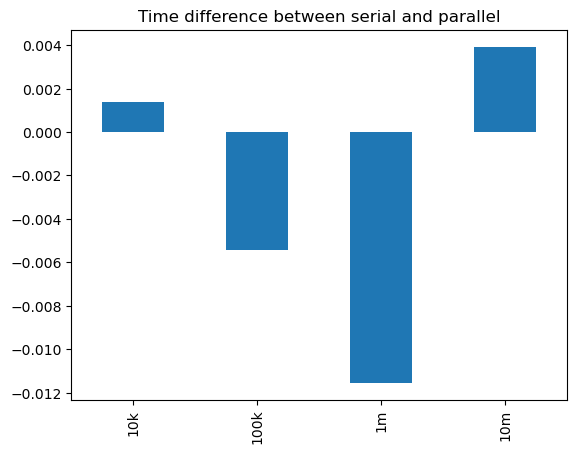

In [ ]:
time_diff.plot(kind="bar", title="Time difference between serial and parallel")


## Code

In [ ]:
double sumArray(double *a, int numValues, int numThreads)
{
    int i;
    double result = 0.0;
    omp_set_num_threads(numThreads);
    #pragma omp parallel for reduction(+:result)
    for (i = 0; i < numValues; i++)
    {
        result += a[i];
    }

    return result;
}